In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
from datetime import datetime,timedelta
import cmath
import matplotlib as mpl
from matplotlib.lines import Line2D
import math
from math import radians, cos, sin, asin, sqrt
import xesmf

%matplotlib inline

In [2]:
input_path = '/home/hgrosselindemann/Documents/TORI/'

velocity_fine = xr.open_dataset(input_path + 'velocity_raw_filtered.nc')
wind = xr.open_dataset(input_path + 'ERA5_10m_winds.nc')
wind = wind.rename({'longitude':'lon','latitude':'lat'})

In [3]:
velocity = xr.Dataset(
    {
        "lat": (["lat"], wind.lat.data),
        "lon": (["lon"], wind.lon.data)
}
)

In [4]:
regridder = xesmf.Regridder(velocity_fine,velocity,'bilinear')
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_60x49_29x25.nc 
Reuse pre-computed weights? False 
Input grid shape:           (60, 49) 
Output grid shape:          (29, 25) 
Periodic in longitude?      False

In [5]:
velocity = regridder(velocity_fine)

In [6]:
velocity = velocity.where(velocity.u!=0)

In [7]:
velocity.to_netcdf(input_path + 'velocity_raw_filtered_ERA5Grid.nc')

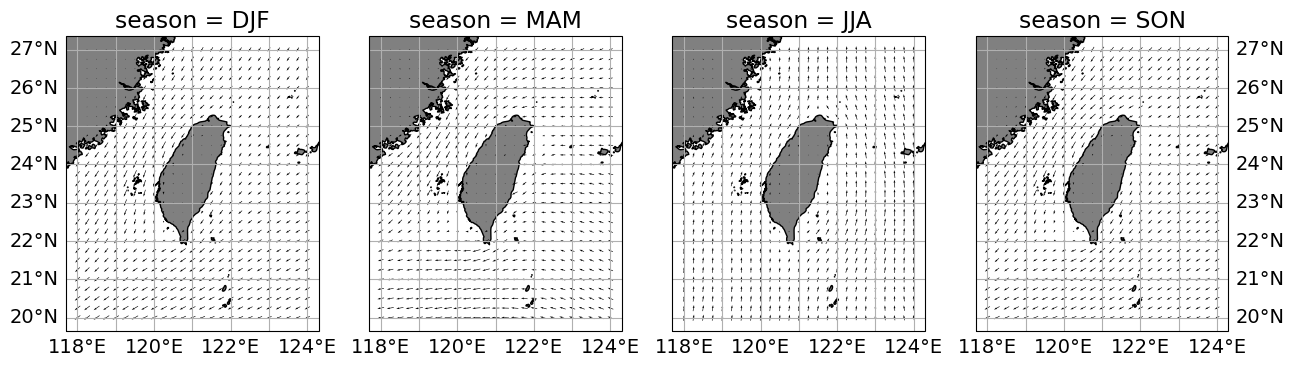

In [81]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,5),subplot_kw={'projection':ccrs.PlateCarree()})

season_mean = wind.groupby('time.season').mean()
season_mean.sel(season='DJF').plot.quiver('lon','lat','u10','v10',ax=ax1)
season_mean.sel(season='MAM').plot.quiver('lon','lat','u10','v10',ax=ax2)
season_mean.sel(season='JJA').plot.quiver('lon','lat','u10','v10',ax=ax3)
season_mean.sel(season='SON').plot.quiver('lon','lat','u10','v10',ax=ax4)

ax1.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
gl1 = ax1.gridlines(draw_labels=True)
gl1.top_labels=False
gl1.right_labels=False

ax2.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
gl2 = ax2.gridlines(draw_labels=True)
gl2.top_labels=False
gl2.right_labels=False
gl2.left_labels=False

ax3.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
gl3 = ax3.gridlines(draw_labels=True)
gl3.top_labels=False
gl3.right_labels=False
gl3.left_labels=False

ax4.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
gl4 = ax4.gridlines(draw_labels=True)
gl4.top_labels=False
gl4.left_labels=False

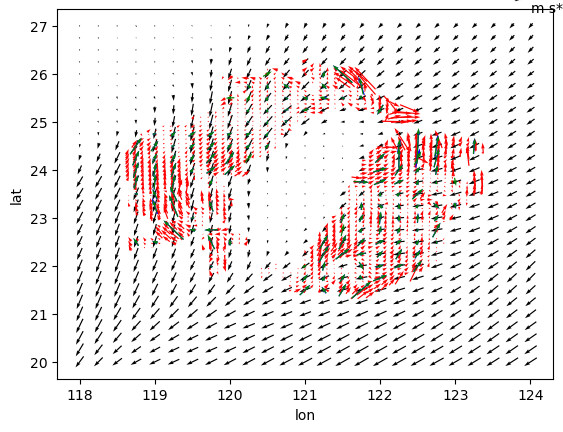

In [26]:
wind.isel(time=0).plot.quiver(x='lon',y='lat',u='u10',v='v10')
velocity.isel(time=0).plot.quiver(x='lon',y='lat',u='u',v='v',color='r')
ds_out.isel(time=0).plot.quiver(x='lon',y='lat',u='u',v='v',color='b')
test.plot.quiver(x='lon',y='lat',u='u',v='v',color='g')
